#Data Visualization
This notebook was created to help visualize a sample of audio files being used in our speech recognition algorithm.


If you are working with data downloaded using our data_checker.py script, please be sure to have your Google Drive mounted if necessary and your environment in the correct working directory.

In [ ]:
!pip install librosa
!pip install ffmpeg

##Importing Audio
These cells selects two audio files from your dataset at random to process and visualize, creating and displaying amplitude envelopes for both.

In [58]:
import random
import librosa
from os import listdir
from os.path import isfile, join

#Select audio files at random to compare and display
file_list = [f for f in listdir(".") if isfile(join(".", f))]
audio_data = random.sample(file_list, 2)
print("Audio files chosen: " + ", ".join(audio_data))

#This returns an audio time series as a numpy array with a default sampling rate(sr) of 22KHZ
x,sr0 = librosa.load(audio_data[0], sr=None)
y,sr1 = librosa.load(audio_data[1], sr=None)

#We can change this behavior by resampling at sr=44.1KHz.
x,sr0 = librosa.load(audio_data[0], sr=44000)
y,sr1 = librosa.load(audio_data[1], sr=44000)

Audio files chosen: 153753275_28472854.m4a, 134463693_23811948.m4a


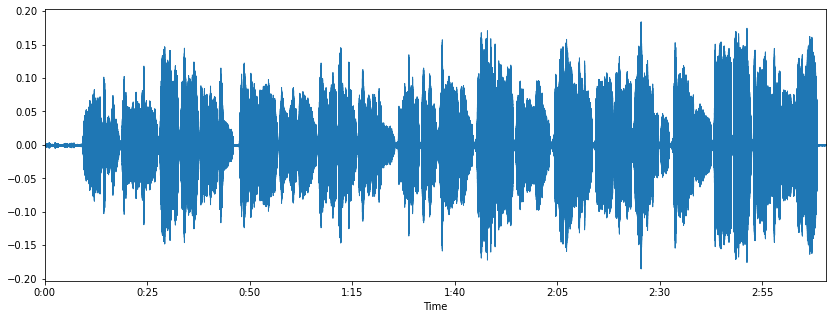

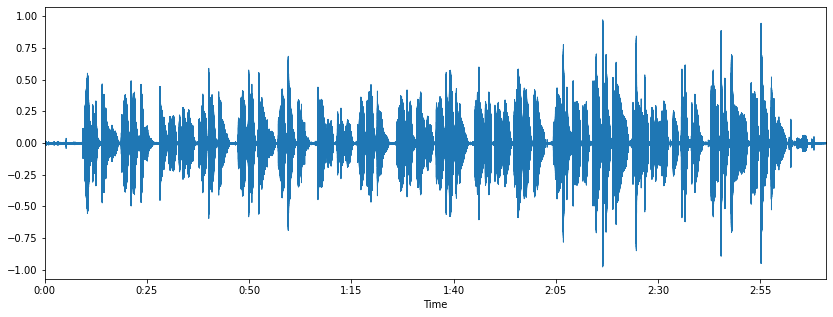

In [59]:
%matplotlib inline
import matplotlib.pyplot as plt
import librosa.display

#Plot the sampled signals against each other
plt.figure(figsize=(14, 5))
librosa.display.waveplot(x, sr=44000)

plt.figure(figsize=(14, 5))
librosa.display.waveplot(y, sr=44000)

##Mel Spectrograms and Tempo Estimation
Next, we display both audio files using a variety of different techniques. The Mel Spectrogram is a nonlinear transformation of an audio file's frequency that uses a Fourier Transform to display audio on a scale in the context of the human hearing range. The Tempo Estimation graph displays the onset autocorrelation of an audio file, which analyzes the underlying rhythm of the file and is able to identify which peak is the true tempo of the song.

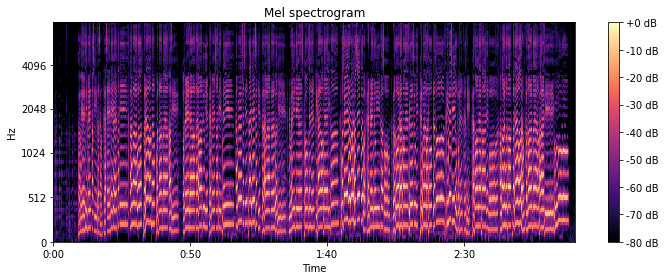

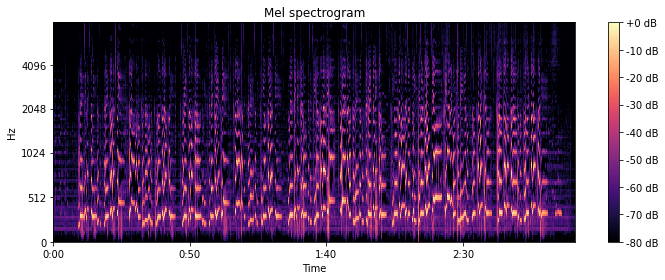

In [60]:
import numpy as np 
import matplotlib.pyplot as plt 
from glob import glob
import librosa as lr
import librosa.display

y, sr = lr.load('./{}'.format(audio_data[0]))
lr.feature.melspectrogram(y=y, sr=sr)
D = np.abs(lr.stft(y))**2
S = lr.feature.melspectrogram(S=D)
S = lr.feature.melspectrogram(y=y, sr=sr, n_mels=128,fmax=8000)
plt.figure(figsize=(10, 4))
lr.display.specshow(lr.power_to_db(S,ref=np.max),y_axis='mel', fmax=8000,x_axis='time')
plt.colorbar(format='%+2.0f dB')
plt.title('Mel spectrogram')
plt.tight_layout()
plt.show()

y, sr = lr.load('./{}'.format(audio_data[1]))
lr.feature.melspectrogram(y=y, sr=sr)
D = np.abs(lr.stft(y))**2
S = lr.feature.melspectrogram(S=D)
S = lr.feature.melspectrogram(y=y, sr=sr, n_mels=128,fmax=8000)
plt.figure(figsize=(10, 4))
lr.display.specshow(lr.power_to_db(S,ref=np.max),y_axis='mel', fmax=8000, x_axis='time')
plt.colorbar(format='%+2.0f dB')
plt.title('Mel spectrogram')
plt.tight_layout()
plt.show()

/usr/local/lib/python3.6/dist-packages/librosa/beat.py:306: DeprecationWarning: np.asscalar(a) is deprecated since NumPy v1.16, use a.item() instead
  hop_length=hop_length))


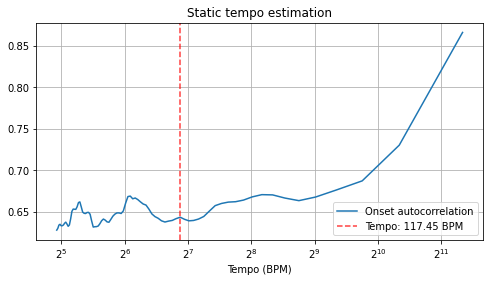

/usr/local/lib/python3.6/dist-packages/librosa/beat.py:306: DeprecationWarning: np.asscalar(a) is deprecated since NumPy v1.16, use a.item() instead
  hop_length=hop_length))


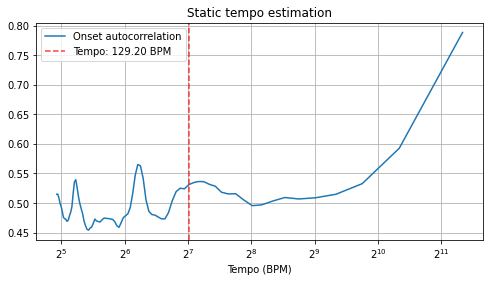

In [61]:
import numpy as np 
import matplotlib.pyplot as plt 
from glob import glob
import librosa as lr

y, sr = lr.load('./{}'.format(audio_data[0]))
onset_env = lr.onset.onset_strength(y, sr=sr)
tempo = lr.beat.tempo(onset_envelope=onset_env, sr=sr)
tempo = tempo.item()

# Compute 2-second windowed autocorrelation
hop_length = 512
ac = lr.autocorrelate(onset_env, 2 * sr // hop_length)
freqs = lr.tempo_frequencies(len(ac), sr=sr,hop_length=hop_length)

# Plot on a BPM axis.  We skip the first (0-lag) bin.
plt.figure(figsize=(8,4))
plt.semilogx(freqs[1:], lr.util.normalize(ac)[1:],label='Onset autocorrelation', basex=2)
plt.axvline(tempo, 0, 1, color='r', alpha=0.75, linestyle='--',label='Tempo: {:.2f} BPM'.format(tempo))
plt.xlabel('Tempo (BPM)')
plt.grid()
plt.title('Static tempo estimation')
plt.legend(frameon=True)
plt.axis('tight')
plt.show()

y, sr = lr.load('./{}'.format(audio_data[1]))
onset_env = lr.onset.onset_strength(y, sr=sr)
tempo = lr.beat.tempo(onset_envelope=onset_env, sr=sr)
tempo = tempo.item()

# Compute 2-second windowed autocorrelation
hop_length = 512
ac = lr.autocorrelate(onset_env, 2 * sr // hop_length)
freqs = lr.tempo_frequencies(len(ac), sr=sr,hop_length=hop_length)

# Plot on a BPM axis.  We skip the first (0-lag) bin.
plt.figure(figsize=(8,4))
plt.semilogx(freqs[1:], lr.util.normalize(ac)[1:],label='Onset autocorrelation', basex=2)
plt.axvline(tempo, 0, 1, color='r', alpha=0.75, linestyle='--',label='Tempo: {:.2f} BPM'.format(tempo))
plt.xlabel('Tempo (BPM)')
plt.grid()
plt.title('Static tempo estimation')
plt.legend(frameon=True)
plt.axis('tight')
plt.show()